1. Using scipy to import channel data into python

In [111]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mat16A = scipy.io.loadmat('./data/2017.10.18_16.58.07_1.A.mat')
mat16B = scipy.io.loadmat('./data/2017.10.18_16.58.07_1.B.mat')
mat17A = scipy.io.loadmat('./data/2017.10.18_17.10.19_1.A.mat')
mat17B = scipy.io.loadmat('./data/2017.10.18_17.10.19_1.B.mat')

mat16A.items()

dict_items([('T1', array([[0.0000000e+00, 2.0000000e-07, 4.0000000e-07, ..., 3.3554426e+00,
        3.3554428e+00, 3.3554430e+00]])), ('Y1', array([[7988, 7994, 7952, ..., 7986, 7998, 7960]], dtype=uint16))])

2. Plots portion of the raw data

In [3]:
mat16A['T1'].shape

(1, 16777216)

In [91]:
x1 = mat16A['T1'][0,:]
y1 = mat16A['Y1'][0,:]

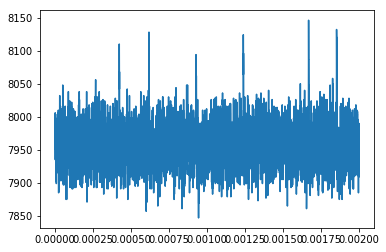

In [92]:
plt.plot(x1[:10000],y1[:10000])
plt.show()

3. The next step is to plot a histogram of the peak data to get an idea for the thresholds for certain number of photons

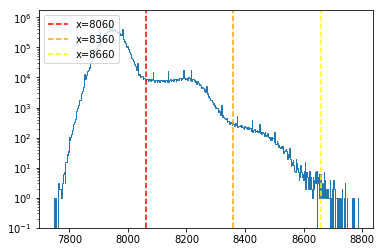

In [109]:
# Vertical lines drawn at 8060, 8360, 8660 corresponding to 1, 2, or 3 photons
# These thresholds are handpicked, and frequencies are still rather large at the threshold values, thresholds should ideally be at dips
plt.hist(y1,bins=500,log=True,histtype='step')
plt.axvline(x=8060,linestyle='dashed', color='red',label='x=8060')
plt.axvline(x=8360,linestyle='dashed', color='orange', label='x=8360')
plt.axvline(x=8660,linestyle='dashed', color='yellow', label='x=8660')
plt.legend()
plt.show()

4. Let's try some peak detection using derivatives done through convolution kernels

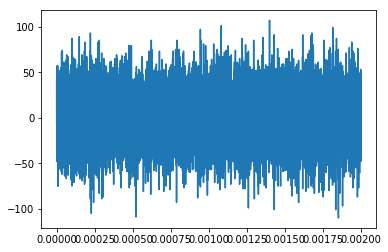

In [131]:
y2 = np.convolve(y1,[-1,1],mode='valid') #this is noisy need to find how many points wide a typical peak is
plt.plot(x1[:10000],y2[:10000])
plt.show()

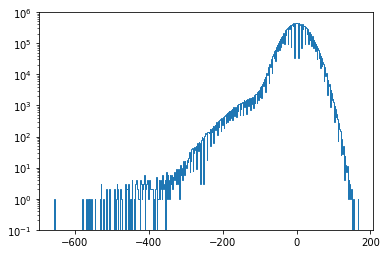

In [132]:
plt.hist(y2,bins=500,log=True,histtype='step')
plt.show()